# Experiement: Round Two | 9%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_9.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  40027  20448       2     173    64.0    130     90            1     1   
1  63254  18203       2     175    74.0    130     80            3     1   
2  51545  23292       1     152    53.0    120     80            1     1   
3  58751  19080       2     170    70.0    140     90            1     1   
4  28892  18321       1     160    72.0    120     80            1     1   

   smoke  alco  active  cardio  
0      1     0       1       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       1       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38179 entries, 0 to 38178
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           38179 non-null  int64  
 1   age          38179 non-null  int64  
 2   gender       38179 non-null  int64  
 3   height       38179 non-null  int64  
 4   weight       38179 non-null  float64
 5   ap_hi        38179 non-null  int64  
 6   ap_lo        38179 non-null  int64  
 7   cholesterol  38179 non-null  int64  
 8   gluc         38179 non-null  int64  
 9   smoke        38179 non-null  int64  
 10  alco         38179 non-null  int64  
 11  active       38179 non-null  int64  
 12  cardio       38179 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 3.8 MB


0    34679
1     3500
Name: cardio, dtype: int64

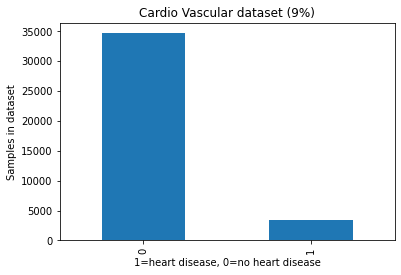

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (9%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

Balance ratio: 3500/38179 = 0,091673

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
9703   18478  18147       1     180    69.0    140    100            1     1   
25036  62475  18736       1     153    57.0    110     70            1     1   
34624  89715  20285       2     175    63.0    125     80            1     1   
30921  79064  18228       1     165    58.0    120     79            1     1   
25275  63124  14671       1     165    85.0    120     80            1     1   

       smoke  alco  active  
9703       0     0       0  
25036      0     0       1  
34624      0     0       1  
30921      0     0       1  
25275      0     0       0

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27743
           1       0.26      0.00      0.01      2800

    accuracy                           0.91     30543
   macro avg       0.58      0.50      0.48     30543
weighted avg       0.85      0.91      0.87     30543



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6936
           1       0.07      0.00      0.00       700

    accuracy                           0.91      7636
   macro avg       0.49      0.50      0.48      7636
weighted avg       0.83      0.91      0.86      7636



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.667


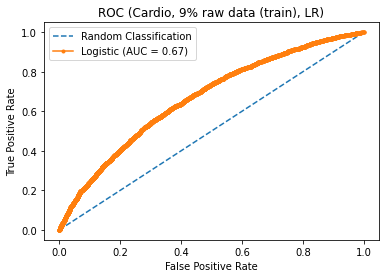

In [8]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.625


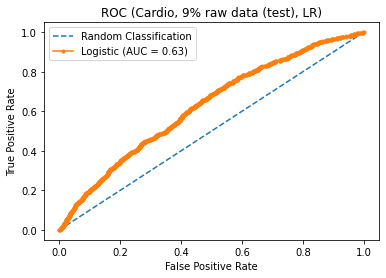

In [9]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27743
           1       0.95      0.01      0.01      2800

    accuracy                           0.91     30543
   macro avg       0.93      0.50      0.48     30543
weighted avg       0.91      0.91      0.87     30543



In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6936
           1       0.60      0.00      0.01       700

    accuracy                           0.91      7636
   macro avg       0.75      0.50      0.48      7636
weighted avg       0.88      0.91      0.87      7636



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.746


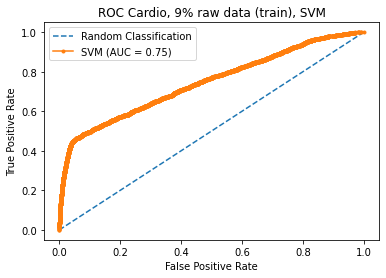

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.584


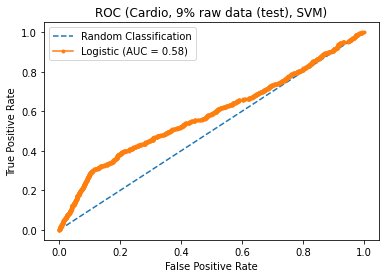

In [13]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [14]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [15]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.09102	validation_0-logloss:0.62554	validation_1-error:0.09246	validation_1-logloss:0.62618
[1]	validation_0-error:0.09079	validation_0-logloss:0.57018	validation_1-error:0.09219	validation_1-logloss:0.57130
[2]	validation_0-error:0.09105	validation_0-logloss:0.52420	validation_1-error:0.09167	validation_1-logloss:0.52570
[3]	validation_0-error:0.09141	validation_0-logloss:0.48574	validation_1-error:0.09167	validation_1-logloss:0.48776
[4]	validation_0-error:0.09141	validation_0-logloss:0.45324	validation_1-error:0.09167	validation_1-logloss:0.45571
[5]	validation_0-error:0.09141	validation_0-logloss:0.42549	validation_1-error:0.09167	validation_1-logloss:0.42845
[6]	validation_0-error:0.09138	validation_0-logloss:0.40177	validation_1-error:0.09180	validation_1-logloss:0.40518
[7]	validation_0-error:0.09128	validation_0-logloss:0.38125	validation_1-error:0.09167	validation_1-logloss:0.38513
[8]	validation_0-error:0.09131	validation_0-logloss:0.36358	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27743
           1       0.78      0.01      0.03      2800

    accuracy                           0.91     30543
   macro avg       0.85      0.51      0.49     30543
weighted avg       0.90      0.91      0.87     30543



In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6936
           1       0.33      0.00      0.01       700

    accuracy                           0.91      7636
   macro avg       0.62      0.50      0.48      7636
weighted avg       0.86      0.91      0.87      7636



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.825


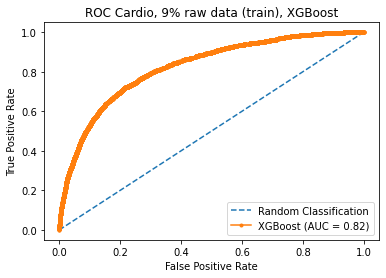

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.777


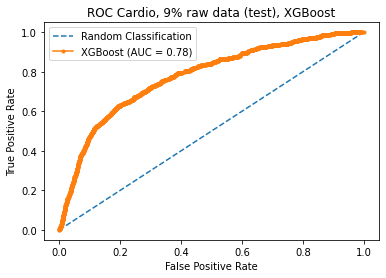

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [20]:
df_train = X_train
df_train['cardio'] = y_train

In [21]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
9703   18478  18147       1     180    69.0    140    100            1     1   
25036  62475  18736       1     153    57.0    110     70            1     1   
34624  89715  20285       2     175    63.0    125     80            1     1   
30921  79064  18228       1     165    58.0    120     79            1     1   
25275  63124  14671       1     165    85.0    120     80            1     1   

       smoke  alco  active  cardio  
9703       0     0       0       0  
25036      0     0       1       0  
34624      0     0       1       0  
30921      0     0       1       0  
25275      0     0       0       0


### SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

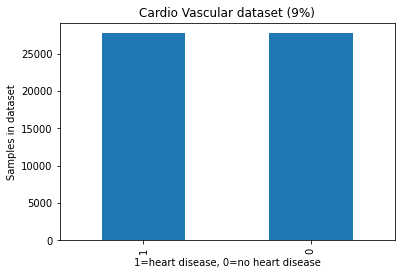

In [22]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (9%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [23]:
X_train = df_oversampler
y_train = df_oversampler_y

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     27743
           1       0.72      0.70      0.71     27743

    accuracy                           0.72     55486
   macro avg       0.72      0.72      0.72     55486
weighted avg       0.72      0.72      0.72     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      6936
           1       0.18      0.60      0.28       700

    accuracy                           0.71      7636
   macro avg       0.56      0.66      0.55      7636
weighted avg       0.88      0.71      0.77      7636



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.778


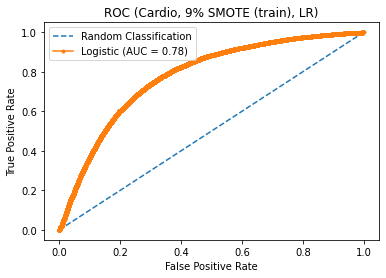

In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.720


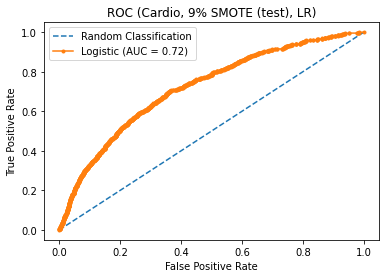

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     27743
           1       0.79      0.78      0.79     27743

    accuracy                           0.79     55486
   macro avg       0.79      0.79      0.79     55486
weighted avg       0.79      0.79      0.79     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      6936
           1       0.18      0.49      0.27       700

    accuracy                           0.76      7636
   macro avg       0.56      0.63      0.56      7636
weighted avg       0.87      0.76      0.80      7636



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.863


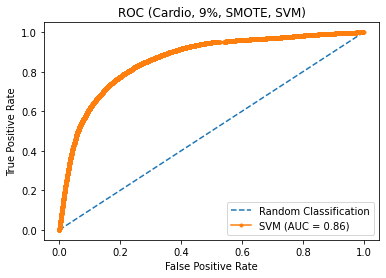

In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.710


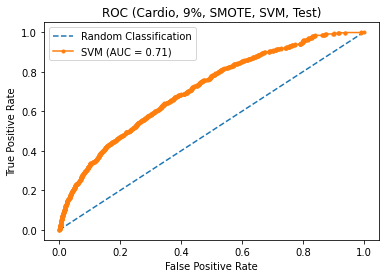

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.18533	validation_0-logloss:0.64979	validation_1-error:0.16972	validation_1-logloss:0.65387
[1]	validation_0-error:0.18360	validation_0-logloss:0.61387	validation_1-error:0.20914	validation_1-logloss:0.62145
[2]	validation_0-error:0.18680	validation_0-logloss:0.58475	validation_1-error:0.20665	validation_1-logloss:0.59509
[3]	validation_0-error:0.16878	validation_0-logloss:0.55733	validation_1-error:0.17889	validation_1-logloss:0.57051
[4]	validation_0-error:0.18192	validation_0-logloss:0.53762	validation_1-error:0.20325	validation_1-logloss:0.55317
[5]	validation_0-error:0.18150	validation_0-logloss:0.51979	validation_1-error:0.20194	validation_1-logloss:0.53723
[6]	validation_0-error:0.17595	validation_0-logloss:0.50191	validation_1-error:0.20325	validation_1-logloss:0.52212
[7]	validation_0-error:0.17732	validation_0-logloss:0.48664	validation_1-error:0.20286	validation_1-logloss:0.50886
[8]	validation_0-error:0.17314	validation_0-logloss:0.47402	validation_1

[71]	validation_0-error:0.12261	validation_0-logloss:0.29667	validation_1-error:0.14864	validation_1-logloss:0.36283
[72]	validation_0-error:0.12216	validation_0-logloss:0.29596	validation_1-error:0.14877	validation_1-logloss:0.36242
[73]	validation_0-error:0.12162	validation_0-logloss:0.29544	validation_1-error:0.14890	validation_1-logloss:0.36207
[74]	validation_0-error:0.12140	validation_0-logloss:0.29459	validation_1-error:0.14824	validation_1-logloss:0.36162
[75]	validation_0-error:0.12109	validation_0-logloss:0.29433	validation_1-error:0.14851	validation_1-logloss:0.36148
[76]	validation_0-error:0.12093	validation_0-logloss:0.29368	validation_1-error:0.14811	validation_1-logloss:0.36095
[77]	validation_0-error:0.12062	validation_0-logloss:0.29308	validation_1-error:0.14733	validation_1-logloss:0.36080
[78]	validation_0-error:0.12057	validation_0-logloss:0.29247	validation_1-error:0.14680	validation_1-logloss:0.36066
[79]	validation_0-error:0.12030	validation_0-logloss:0.29209	val

[141]	validation_0-error:0.10513	validation_0-logloss:0.25845	validation_1-error:0.13685	validation_1-logloss:0.34261
[142]	validation_0-error:0.10476	validation_0-logloss:0.25723	validation_1-error:0.13607	validation_1-logloss:0.34212
[143]	validation_0-error:0.10453	validation_0-logloss:0.25643	validation_1-error:0.13567	validation_1-logloss:0.34186
[144]	validation_0-error:0.10408	validation_0-logloss:0.25559	validation_1-error:0.13580	validation_1-logloss:0.34146
[145]	validation_0-error:0.10368	validation_0-logloss:0.25535	validation_1-error:0.13659	validation_1-logloss:0.34149
[146]	validation_0-error:0.10338	validation_0-logloss:0.25472	validation_1-error:0.13646	validation_1-logloss:0.34111
[147]	validation_0-error:0.10327	validation_0-logloss:0.25456	validation_1-error:0.13567	validation_1-logloss:0.34109
[148]	validation_0-error:0.10312	validation_0-logloss:0.25440	validation_1-error:0.13528	validation_1-logloss:0.34103
[149]	validation_0-error:0.10309	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     27743
           1       0.94      0.88      0.91     27743

    accuracy                           0.91     55486
   macro avg       0.91      0.91      0.91     55486
weighted avg       0.91      0.91      0.91     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6936
           1       0.27      0.24      0.25       700

    accuracy                           0.87      7636
   macro avg       0.60      0.59      0.59      7636
weighted avg       0.86      0.87      0.87      7636



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.969


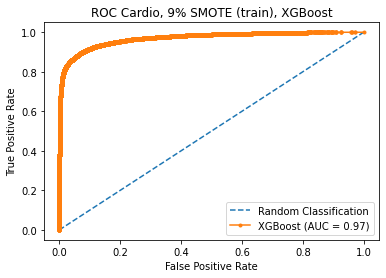

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.748


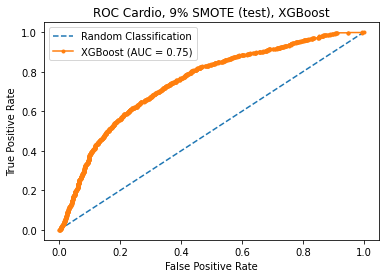

In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1     2800
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(3000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1     2816
Name: cardio, dtype: int64

In [39]:
tvae = TVAE()

tvae.fit(tvae_result_df)
# Once trained generate samples
samples = tvae.sample(5000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df1 = pd.concat([tvae_result_df,samples])
tvae_result_df1['cardio'].value_counts()

0    27743
1     2816
Name: cardio, dtype: int64

In [40]:
tvae = TVAE()

tvae.fit(tvae_result_df1)
# Once trained generate samples
samples = tvae.sample(7000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df2 = pd.concat([tvae_result_df1,samples])
tvae_result_df2['cardio'].value_counts()

0    27743
1     2816
Name: cardio, dtype: int64

In [41]:
tvae = TVAE()

tvae.fit(tvae_result_df2)
# Once trained generate samples
samples = tvae.sample(7500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df3 = pd.concat([tvae_result_df2,samples])
tvae_result_df3['cardio'].value_counts()

0    27743
1     2816
Name: cardio, dtype: int64

In [42]:
tvae = TVAE()

tvae.fit(tvae_result_df3)
# Once trained generate samples
samples = tvae.sample(5000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df4 = pd.concat([tvae_result_df3,samples])
tvae_result_df4['cardio'].value_counts()

0    27743
1     2816
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_result_df4)
# Once trained generate samples
samples = tvae.sample(7000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df5 = pd.concat([tvae_result_df4,samples])
tvae_result_df5['cardio'].value_counts()

0    27743
1     2817
Name: cardio, dtype: int64

In [44]:
tvae = TVAE()

tvae.fit(tvae_result_df5)
# Once trained generate samples
samples = tvae.sample(7000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df6 = pd.concat([tvae_result_df5,samples])
tvae_result_df6['cardio'].value_counts()

0    27743
1     3597
Name: cardio, dtype: int64

In [45]:
tvae = TVAE()

tvae.fit(tvae_result_df6)
# Once trained generate samples
samples = tvae.sample(6000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df7 = pd.concat([tvae_result_df6,samples])
tvae_result_df7['cardio'].value_counts()

0    27743
1     5042
Name: cardio, dtype: int64

In [46]:
tvae = TVAE()

tvae.fit(tvae_result_df7)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df8 = pd.concat([tvae_result_df7,samples])
tvae_result_df8['cardio'].value_counts()

0    27743
1     6805
Name: cardio, dtype: int64

In [47]:
tvae = TVAE()

tvae.fit(tvae_result_df8)
# Once trained generate samples
samples = tvae.sample(12000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df9 = pd.concat([tvae_result_df8,samples])
tvae_result_df9['cardio'].value_counts()

0    27743
1     9838
Name: cardio, dtype: int64

In [48]:
tvae = TVAE()

tvae.fit(tvae_result_df9)
# Once trained generate samples
samples = tvae.sample(13000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df10 = pd.concat([tvae_result_df9,samples])
tvae_result_df10['cardio'].value_counts()

0    27743
1    14495
Name: cardio, dtype: int64

In [49]:
tvae = TVAE()

tvae.fit(tvae_result_df10)
# Once trained generate samples
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df11 = pd.concat([tvae_result_df10,samples])
tvae_result_df11['cardio'].value_counts()

0    27743
1    21957
Name: cardio, dtype: int64

In [50]:
tvae = TVAE()

tvae.fit(tvae_result_df11)
# Once trained generate samples
samples = tvae.sample(23000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df12 = pd.concat([tvae_result_df11,samples])
tvae_result_df12['cardio'].value_counts()

1    32272
0    27743
Name: cardio, dtype: int64

In [51]:
tvae = TVAE()

tvae.fit(tvae_result_df12)
# Once trained generate samples
samples = tvae.sample(27000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df13 = pd.concat([tvae_result_df12,samples])
tvae_result_df13['cardio'].value_counts()

1    43512
0    27743
Name: cardio, dtype: int64

In [52]:
tvae = TVAE()

tvae.fit(tvae_result_df13)
# Once trained generate samples
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df14 = pd.concat([tvae_result_df13,samples])
tvae_result_df14['cardio'].value_counts()

1    44714
0    27743
Name: cardio, dtype: int64

In [53]:
tvae_result_df_1 = tvae_result_df14[tvae_result_df14['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    44714
Name: cardio, dtype: int64

In [54]:
tvae_result_df_0 = tvae_result_df13[tvae_result_df13['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [55]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)

In [56]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

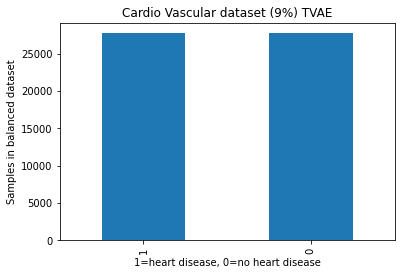

In [57]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (9%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [58]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [59]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     27743
           1       0.75      0.74      0.75     27743

    accuracy                           0.75     55486
   macro avg       0.75      0.75      0.75     55486
weighted avg       0.75      0.75      0.75     55486



In [60]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      6936
           1       0.10      0.27      0.14       700

    accuracy                           0.71      7636
   macro avg       0.50      0.51      0.48      7636
weighted avg       0.84      0.71      0.76      7636



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.808


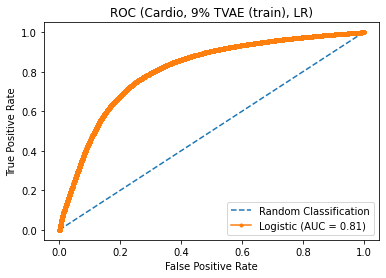

In [61]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.502


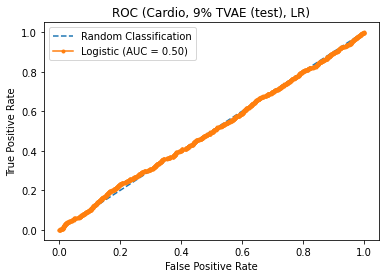

In [62]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with TVAE balanced data

In [63]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27743
           1       0.98      0.89      0.93     27743

    accuracy                           0.93     55486
   macro avg       0.94      0.93      0.93     55486
weighted avg       0.94      0.93      0.93     55486



In [64]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6936
           1       0.13      0.03      0.05       700

    accuracy                           0.89      7636
   macro avg       0.52      0.51      0.50      7636
weighted avg       0.84      0.89      0.86      7636



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.970


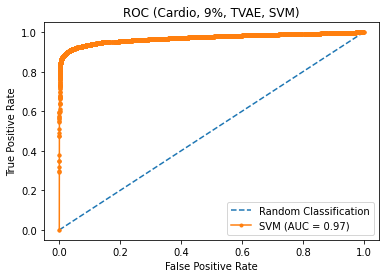

In [65]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.609


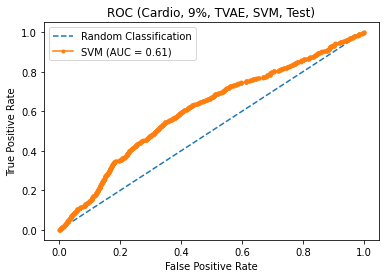

In [66]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [67]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.12452	validation_0-logloss:0.63045	validation_1-error:0.10830	validation_1-logloss:0.64148
[1]	validation_0-error:0.08298	validation_0-logloss:0.57613	validation_1-error:0.13017	validation_1-logloss:0.59698
[2]	validation_0-error:0.08409	validation_0-logloss:0.53262	validation_1-error:0.14065	validation_1-logloss:0.56206
[3]	validation_0-error:0.07910	validation_0-logloss:0.49404	validation_1-error:0.13751	validation_1-logloss:0.53099
[4]	validation_0-error:0.08036	validation_0-logloss:0.46211	validation_1-error:0.13921	validation_1-logloss:0.50614
[5]	validation_0-error:0.07944	validation_0-logloss:0.43410	validation_1-error:0.13829	validation_1-logloss:0.48429
[6]	validation_0-error:0.07672	validation_0-logloss:0.41066	validation_1-error:0.13070	validation_1-logloss:0.46580
[7]	validation_0-error:0.07503	validation_0-logloss:0.38779	validation_1-error:0.13030	validation_1-logloss:0.44847
[8]	validation_0-error:0.07510	validation_0-logloss:0.36899	validation_1

[71]	validation_0-error:0.04459	validation_0-logloss:0.14019	validation_1-error:0.09992	validation_1-logloss:0.28534
[72]	validation_0-error:0.04459	validation_0-logloss:0.14002	validation_1-error:0.09992	validation_1-logloss:0.28534
[73]	validation_0-error:0.04444	validation_0-logloss:0.13974	validation_1-error:0.09979	validation_1-logloss:0.28519
[74]	validation_0-error:0.04435	validation_0-logloss:0.13914	validation_1-error:0.10005	validation_1-logloss:0.28520
[75]	validation_0-error:0.04410	validation_0-logloss:0.13812	validation_1-error:0.09992	validation_1-logloss:0.28501
[76]	validation_0-error:0.04410	validation_0-logloss:0.13787	validation_1-error:0.09979	validation_1-logloss:0.28486
[77]	validation_0-error:0.04407	validation_0-logloss:0.13730	validation_1-error:0.09979	validation_1-logloss:0.28486
[78]	validation_0-error:0.04401	validation_0-logloss:0.13712	validation_1-error:0.09979	validation_1-logloss:0.28474
[79]	validation_0-error:0.04390	validation_0-logloss:0.13685	val

[141]	validation_0-error:0.03938	validation_0-logloss:0.12246	validation_1-error:0.09796	validation_1-logloss:0.28067
[142]	validation_0-error:0.03941	validation_0-logloss:0.12243	validation_1-error:0.09796	validation_1-logloss:0.28058
[143]	validation_0-error:0.03934	validation_0-logloss:0.12217	validation_1-error:0.09796	validation_1-logloss:0.28066
[144]	validation_0-error:0.03923	validation_0-logloss:0.12198	validation_1-error:0.09770	validation_1-logloss:0.28075
[145]	validation_0-error:0.03900	validation_0-logloss:0.12177	validation_1-error:0.09822	validation_1-logloss:0.28066
[146]	validation_0-error:0.03896	validation_0-logloss:0.12152	validation_1-error:0.09822	validation_1-logloss:0.28034
[147]	validation_0-error:0.03895	validation_0-logloss:0.12135	validation_1-error:0.09809	validation_1-logloss:0.28038
[148]	validation_0-error:0.03900	validation_0-logloss:0.12128	validation_1-error:0.09809	validation_1-logloss:0.28026
[149]	validation_0-error:0.03902	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     27743
           1       0.99      0.93      0.96     27743

    accuracy                           0.96     55486
   macro avg       0.96      0.96      0.96     55486
weighted avg       0.96      0.96      0.96     55486



In [69]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6936
           1       0.17      0.02      0.03       700

    accuracy                           0.90      7636
   macro avg       0.54      0.50      0.49      7636
weighted avg       0.84      0.90      0.86      7636



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.986


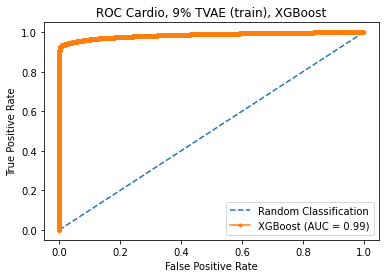

In [70]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.746


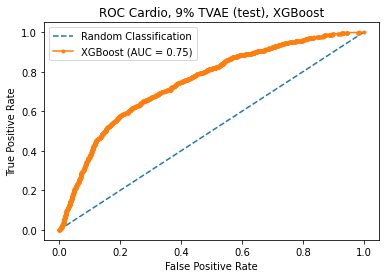

In [71]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [72]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(df_train, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(5000)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    1116
Name: cardio, dtype: int64

In [73]:
df_train_1 = df_train.append(samples)
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples1 = ctgan.sample(7000)
samples1 = samples1[samples1['cardio'] ==1.0]
df_train_2 = df_train_1.append(samples1)
df_train_2['cardio'].value_counts()

0    27743
1     5361
Name: cardio, dtype: int64

In [74]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples2 = ctgan.sample(8000)
samples2 = samples2[samples2['cardio'] ==1.0]

In [75]:
df_train_3 = df_train_2.append(samples2)
df_train_3['cardio'].value_counts()

0    27743
1     6548
Name: cardio, dtype: int64

In [76]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_3, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples3 = ctgan.sample(6000)
samples3 = samples3[samples3['cardio'] ==1.0]
df_train_4 = df_train_3.append(samples3)
df_train_4['cardio'].value_counts()

0    27743
1     8209
Name: cardio, dtype: int64

In [77]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_4, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples4 = ctgan.sample(6000)
samples4 = samples4[samples4['cardio'] ==1.0]
df_train_5 = df_train_4.append(samples4)
df_train_5['cardio'].value_counts()

0    27743
1    10264
Name: cardio, dtype: int64

In [78]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_5, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples5 = ctgan.sample(8000)
samples5 = samples5[samples5['cardio'] ==1.0]
df_train_6 = df_train_5.append(samples5)
df_train_6['cardio'].value_counts()

0    27743
1    13183
Name: cardio, dtype: int64

In [79]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_6, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples6 = ctgan.sample(10000)
samples6 = samples6[samples6['cardio'] ==1.0]
df_train_7 = df_train_6.append(samples6)
df_train_7['cardio'].value_counts()

0    27743
1    17690
Name: cardio, dtype: int64

In [80]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_7, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples7 = ctgan.sample(12000)
samples7 = samples7[samples7['cardio'] ==1.0]
df_train_8 = df_train_7.append(samples7)
df_train_8['cardio'].value_counts()

0    27743
1    23193
Name: cardio, dtype: int64

In [81]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_8, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples8 = ctgan.sample(15000)
samples8 = samples8[samples8['cardio'] ==1.0]
df_train_9 = df_train_8.append(samples8)
df_train_9['cardio'].value_counts()

1    30552
0    27743
Name: cardio, dtype: int64

In [82]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_9, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples9 = ctgan.sample(20000)
samples9 = samples9[samples9['cardio'] ==1.0]
df_train_10 = df_train_9.append(samples9)
df_train_10['cardio'].value_counts()

1    43332
0    27743
Name: cardio, dtype: int64

In [83]:
ctgan_df_1 = df_train_10[df_train_10['cardio'] == 1]
ctgan_df_0 = df_train_10[df_train_10['cardio'] == 0]
train_df_1_bal = ctgan_df_1.sample(n = 27743)
ctgan_balanced = ctgan_df_0.append(train_df_1_bal)

ctgan_balanced['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [84]:
X_train = ctgan_balanced.drop(['cardio'], axis=1)
y_train = ctgan_balanced['cardio']

### Logistic Regression with CTGAN data

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     27743
           1       0.66      0.63      0.64     27743

    accuracy                           0.65     55486
   macro avg       0.65      0.65      0.65     55486
weighted avg       0.65      0.65      0.65     55486



In [86]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.66      0.78      6936
           1       0.15      0.58      0.24       700

    accuracy                           0.66      7636
   macro avg       0.54      0.62      0.51      7636
weighted avg       0.87      0.66      0.73      7636



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.705


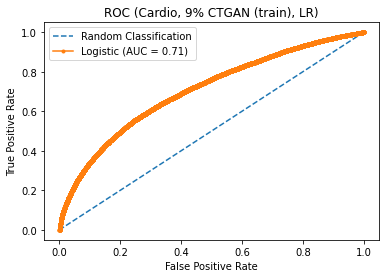

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.679


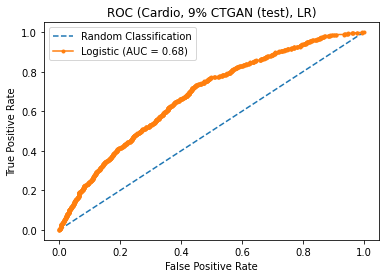

In [88]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

### SVM with CTGAN data

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77     27743
           1       0.78      0.72      0.75     27743

    accuracy                           0.76     55486
   macro avg       0.76      0.76      0.76     55486
weighted avg       0.76      0.76      0.76     55486



In [90]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      6936
           1       0.17      0.42      0.24       700

    accuracy                           0.76      7636
   macro avg       0.55      0.60      0.55      7636
weighted avg       0.86      0.76      0.80      7636



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.833


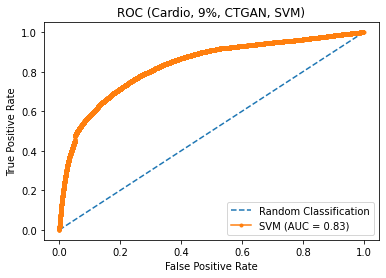

In [91]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.688


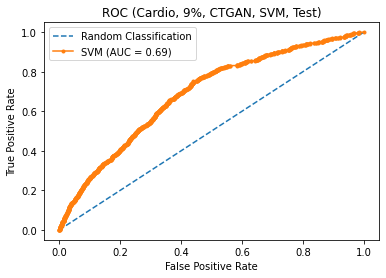

In [92]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### XGBoost with CTGAN data

In [93]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [94]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.18880	validation_0-logloss:0.64823	validation_1-error:0.25930	validation_1-logloss:0.65412
[1]	validation_0-error:0.19598	validation_0-logloss:0.61331	validation_1-error:0.17994	validation_1-logloss:0.62338
[2]	validation_0-error:0.18311	validation_0-logloss:0.58489	validation_1-error:0.12637	validation_1-logloss:0.59831
[3]	validation_0-error:0.18260	validation_0-logloss:0.56111	validation_1-error:0.12428	validation_1-logloss:0.57698
[4]	validation_0-error:0.15231	validation_0-logloss:0.53716	validation_1-error:0.12428	validation_1-logloss:0.55574
[5]	validation_0-error:0.15189	validation_0-logloss:0.51653	validation_1-error:0.12533	validation_1-logloss:0.53751
[6]	validation_0-error:0.15429	validation_0-logloss:0.50280	validation_1-error:0.12441	validation_1-logloss:0.52548
[7]	validation_0-error:0.13712	validation_0-logloss:0.48400	validation_1-error:0.12690	validation_1-logloss:0.51018
[8]	validation_0-error:0.15296	validation_0-logloss:0.47237	validation_1

[71]	validation_0-error:0.08245	validation_0-logloss:0.24066	validation_1-error:0.12480	validation_1-logloss:0.33304
[72]	validation_0-error:0.08200	validation_0-logloss:0.23933	validation_1-error:0.12480	validation_1-logloss:0.33244
[73]	validation_0-error:0.08213	validation_0-logloss:0.23851	validation_1-error:0.12507	validation_1-logloss:0.33205
[74]	validation_0-error:0.08204	validation_0-logloss:0.23794	validation_1-error:0.12520	validation_1-logloss:0.33172
[75]	validation_0-error:0.08182	validation_0-logloss:0.23743	validation_1-error:0.12480	validation_1-logloss:0.33158
[76]	validation_0-error:0.08144	validation_0-logloss:0.23699	validation_1-error:0.12533	validation_1-logloss:0.33153
[77]	validation_0-error:0.08144	validation_0-logloss:0.23656	validation_1-error:0.12533	validation_1-logloss:0.33146
[78]	validation_0-error:0.08087	validation_0-logloss:0.23549	validation_1-error:0.12494	validation_1-logloss:0.33072
[79]	validation_0-error:0.08060	validation_0-logloss:0.23468	val

[141]	validation_0-error:0.06895	validation_0-logloss:0.19863	validation_1-error:0.11865	validation_1-logloss:0.31638
[142]	validation_0-error:0.06895	validation_0-logloss:0.19822	validation_1-error:0.11852	validation_1-logloss:0.31622
[143]	validation_0-error:0.06876	validation_0-logloss:0.19735	validation_1-error:0.11839	validation_1-logloss:0.31602
[144]	validation_0-error:0.06861	validation_0-logloss:0.19709	validation_1-error:0.11878	validation_1-logloss:0.31595
[145]	validation_0-error:0.06861	validation_0-logloss:0.19680	validation_1-error:0.11917	validation_1-logloss:0.31597
[146]	validation_0-error:0.06825	validation_0-logloss:0.19609	validation_1-error:0.11891	validation_1-logloss:0.31579
[147]	validation_0-error:0.06814	validation_0-logloss:0.19559	validation_1-error:0.11917	validation_1-logloss:0.31564
[148]	validation_0-error:0.06807	validation_0-logloss:0.19523	validation_1-error:0.11891	validation_1-logloss:0.31543
[149]	validation_0-error:0.06796	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     27743
           1       0.97      0.90      0.93     27743

    accuracy                           0.94     55486
   macro avg       0.94      0.94      0.94     55486
weighted avg       0.94      0.94      0.94     55486



In [96]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6936
           1       0.21      0.10      0.14       700

    accuracy                           0.88      7636
   macro avg       0.56      0.53      0.54      7636
weighted avg       0.85      0.88      0.86      7636



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.978


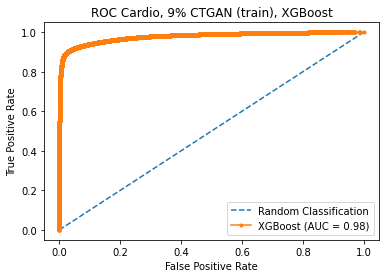

In [97]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.730


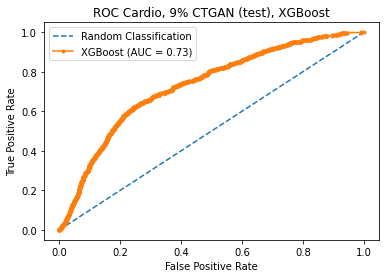

In [98]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()